### Installing dataset
- downloading the Brats 2018 dataset from kaggle 
- unzip the brats dataset

In [ ]:
 
 ! pip install -q kaggle
 from google.colab import files
 files.upload()
 !mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json
 ! kaggle datasets download -d sanglequang/brats2018 
!unzip brats2018.zip -d brats2018
!rm -vrf sample_data

Saving kaggle.json to kaggle.json
100% 3.17G/3.18G [00:20<00:00, 194MB/s]
100% 3.18G/3.18G [00:21<00:00, 161MB/s]
Archive:  brats2018.zip
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_flair.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_seg.nii  
  inflating: brats2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_11_1/Brats18_2013_11_1_t1.nii  
  inflating: brats20

Installing python libraries

In [ ]:
!pip install split-folders segmentation_models_3D mindspore sklearn scipy monai nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 142.7 MB 70 kB/s 
     |████████████████████████████████| 1.1 MB 58.6 MB/s 
     |████████████████████████████████| 9.6 MB 25.7 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 281 kB 65.0 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e6364ea89c8e9f1bae1483be6d1d573a34a5f8df503082d17da906c8c721af78
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


# Importing Python libraries

In [ ]:
# To get our dataset

import numpy as np
import nibabel as nib
import glob
import os
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

# Plotting 

import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Getting our dataset ready



In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# List of all the nii images

t2_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/*/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/*/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/*/*/*flair.nii'))
t1_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/*/*/*t1.nii'))
mask_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/*/*/*seg.nii'))

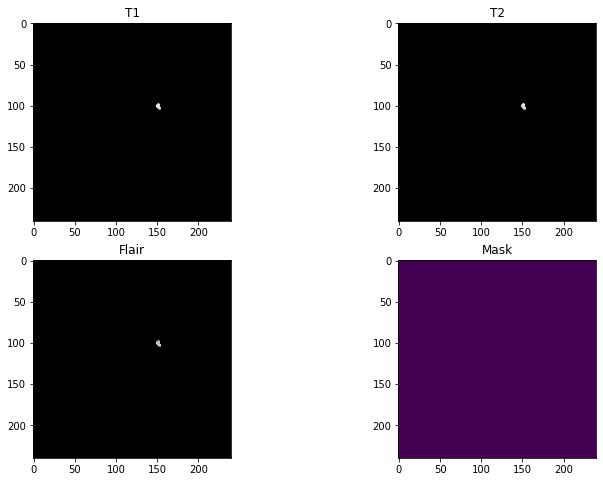

In [ ]:
# Plotting of nii images from Brats 2018 dataset

n_slice=random.randint(0, 155)
plt.figure(figsize=(12, 8))

n = random.randint(0,285)
t2=nib.load(t2_list[n]).get_fdata()
t1=nib.load(t1_list[n]).get_fdata()
flair=nib.load(flair_list[n]).get_fdata()
mask=nib.load(mask_list[n]).get_fdata()

plt.subplot(221)
plt.imshow(t1[:,:,n_slice], cmap='gray')
plt.title('T1')
plt.subplot(222)
plt.imshow(t2[:,:,n_slice], cmap='gray')
plt.title('T2')
plt.subplot(223)
plt.imshow(flair[:,:,n_slice], cmap='gray')
plt.title('Flair')
plt.subplot(224)
plt.imshow(mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
"""

Creating folders :
train128/img -> images with shape (128,128,128)
train128/mask -> mask with shape (128,128,128)
val128/img -> validation images with shape (128,128,128)

"""

from pathlib import Path
Path("./train128/img/").mkdir(parents=True, exist_ok=True)
Path("./train128/mask/").mkdir(parents=True, exist_ok=True)
Path("./val128/img/").mkdir(parents=True, exist_ok=True)

In [ ]:
# List of all the nii validation images

val_t2_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*t2.nii'))
val_t1ce_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*t1ce.nii'))
val_flair_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*flair.nii'))
val_t1_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*t1.nii'))

In [ ]:
"""
VALIDATION DATASET

1. Normalization of numpy array
2. Combining t1 , t1ce, t2, flair into one numpy
2. Croping the numpy array to (128,128,128)
3. Add 4 channels to the numpy array

"""

for img in tqdm(range(0,len(val_t2_list))):   #Using t1_list as all lists are of same size
      
    temp_image_t2=nib.load(val_t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(val_t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(val_flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

    temp_image_t1 = nib.load(val_t1_list[img]).get_fdata()
    temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
        
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2,temp_image_t1], axis=3)
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]

    np.save('./val128/img/img_'+str(img)+'.npy', temp_combined_images)

100%|██████████| 66/66 [01:09<00:00,  1.05s/it]


In [ ]:
val_128_dataset = sorted(glob.glob('/content/val128/img/*.npy'))

In [ ]:
"""
TRAINING DATASET

1. Normalization of numpy array
2. Combining t1 , t1ce, t2, flair into one numpy
2. Croping the numpy array to (128,128,128)
3. Add 4 channels to the numpy array

"""


for img in tqdm(range(int(len(t2_list)))):   #Using t1_list as all lists are of same size
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

    temp_image_t1 = nib.load(t1_list[img]).get_fdata()
    temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2,temp_image_t1], axis=3)
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('./train128/img/img_'+str(img)+'.npy', temp_combined_images)
        np.save('./train128/mask/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("Discard data") 

  1%|▏         | 4/285 [00:06<06:55,  1.48s/it]

Discard data


  5%|▍         | 14/285 [00:21<06:40,  1.48s/it]

Discard data


  9%|▉         | 25/285 [00:38<06:37,  1.53s/it]

Discard data


 17%|█▋        | 48/285 [01:15<05:59,  1.52s/it]

Discard data


 20%|█▉        | 56/285 [01:28<06:09,  1.62s/it]

Discard data


 22%|██▏       | 64/285 [01:40<05:28,  1.49s/it]

Discard data


 28%|██▊       | 81/285 [02:08<05:10,  1.52s/it]

Discard data


 29%|██▉       | 83/285 [02:10<04:42,  1.40s/it]

Discard data


 35%|███▍      | 99/285 [02:35<04:35,  1.48s/it]

Discard data


 36%|███▌      | 102/285 [02:40<04:37,  1.52s/it]

Discard data


 37%|███▋      | 106/285 [02:46<04:21,  1.46s/it]

Discard data


 44%|████▎     | 124/285 [03:15<04:04,  1.52s/it]

Discard data


 52%|█████▏    | 149/285 [03:55<03:31,  1.56s/it]

Discard data


 60%|██████    | 172/285 [04:34<02:55,  1.56s/it]

Discard data


 64%|██████▍   | 183/285 [04:52<02:40,  1.57s/it]

Discard data


 75%|███████▌  | 214/285 [05:44<01:54,  1.61s/it]

Discard data


 81%|████████  | 231/285 [06:12<01:29,  1.66s/it]

Discard data


 92%|█████████▏| 261/285 [07:02<00:35,  1.48s/it]

Discard data


 95%|█████████▌| 271/285 [07:18<00:22,  1.59s/it]

Discard data


 99%|█████████▉| 283/285 [07:38<00:03,  1.62s/it]

Discard data


100%|██████████| 285/285 [07:41<00:00,  1.62s/it]


In [ ]:
train_128_dataset = sorted(glob.glob('/content/val128/img/*.npy'))

In [ ]:
"""

Splitting the train128 folder into :
- training_data/train
- training_data/val

"""

import splitfolders

input_folder = './train128/'
output_folder = './training_data'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

Copying files: 530 files [02:52,  3.07 files/s]


In [ ]:
img = np.load('/content/training_data/val/img/img_104.npy')
mask = np.load('/content/training_data/val/mask/mask_104.npy')
print(f"[IMGAGE SHAPE] : {img.shape}")
print(f"[MASK SHAPE] : {mask.shape}")

[IMGAGE SHAPE] : (128, 128, 128, 4)
[MASK SHAPE] : (128, 128, 128, 4)


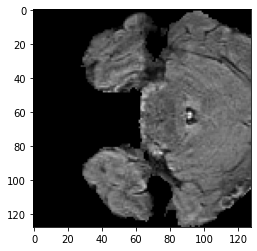

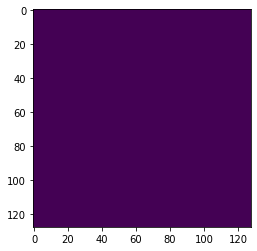

In [ ]:
# Plotting data from our new dataset

n = random.randint(0,128)
img = np.load('/content/training_data/val/img/img_104.npy')
mask = np.load('/content/training_data/val/mask/mask_104.npy')
plt.imshow(img[:,:,n,0],cmap='gray')
plt.show()
plt.imshow(mask[:,:,n,0])
plt.show()

# Data Generator

In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [ ]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir,mask_list[batch_start:limit])


            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [ ]:
# Training Data Genarator

batch_size = 2
train_img_dir = "./training_data/train/img/"
train_mask_dir = "./training_data/train/mask/"
train_img_list=sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))
train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)


In [ ]:
# Validation Data Genarator

val_img_dir = "./training_data/val/mask/"
val_mask_dir = "./training_data/val/mask/"
val_img_list=sorted(os.listdir(val_img_dir))
val_mask_list=sorted(os.listdir(val_mask_dir))
val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

In [ ]:
img, msk = train_img_datagen.__next__()
print(f"[IMGAGE SHAPE] : {img.shape}")
print(f"[MASK SHAPE] : {mask.shape}")

[IMGAGE SHAPE] : (2, 128, 128, 128, 4)
[MASK SHAPE] : (128, 128, 128, 4)


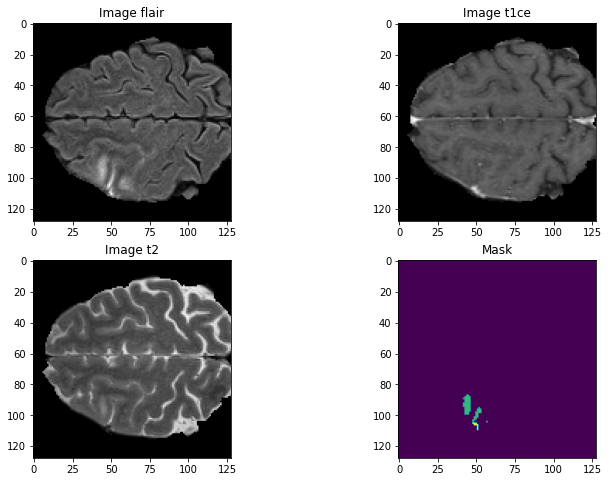

In [ ]:
# Plotting from the train data genarator

img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

# Training UNET Model

In [ ]:
"""

Calculating the weight of different labels
Labels : 
{
  0: not tumor
  1: necrotic and non-enhancing tumor core,
  2: peritumoral edema,
  3: enhancing tumor
}
"""

import pandas as pd
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('./train128/mask/*.npy'))
for img in tqdm(range(len(train_mask_list))):
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4
weights = []
#Class weights claculation: n_samples / (n_classes * n_samples_for_class)
weights.append(round((total_labels/(n_classes*label_0)), 2)) #round to 2 decimals
weights.append(round((total_labels/(n_classes*label_1)), 2))
weights.append(round((total_labels/(n_classes*label_2)), 2))
weights.append(round((total_labels/(n_classes*label_3)), 2))

#bring the weight between 0 to 1 

wt0 = (weights[0] - min(weights))/(max(weights)-min(weights))
wt1 = (weights[1] - min(weights))/(max(weights)-min(weights))
wt2 = (weights[2] - min(weights))/(max(weights)-min(weights))
wt3 = (weights[3] - min(weights))/(max(weights)-min(weights))

100%|██████████| 265/265 [00:41<00:00,  6.34it/s]


In [ ]:
# Importing libraries for building the UNET Model 

from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanIoU


In [ ]:
# Loss Metrics for UNET Model

import segmentation_models_3D as sm
from tensorflow import keras
import numpy as np
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `tf.keras` framework.


In [ ]:
# Custom Metrics for UNET Model 

import tensorflow as tf
import monai

smooth = 1e-15

def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)   

In [ ]:
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5),dice_coef]

In [ ]:
steps_per_epoch = len(train_img_list)//batch_size 
val_steps_per_epoch = len(val_img_list)//batch_size

In [ ]:
kernel_initializer =  'he_uniform'

# UNET Model

In [ ]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs
    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

In [ ]:
model = simple_unet_model(128, 128, 128, 4, 4)
print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 4)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1744        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [ ]:
model.compile(optimizer = optim,loss=total_loss,metrics=metrics)

In [ ]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d.hdf5')

Epoch 1/100
99/99 [==============================] - 118s 1s/step - loss: 0.9949 - accuracy: 0.7724 - iou_score: 0.1316 - dice_coef: 0.5587 - val_loss: 1.0416 - val_accuracy: 0.9525 - val_iou_score: 0.2436 - val_dice_coef: 0.8861
Epoch 2/100
99/99 [==============================] - 177s 2s/step - loss: 0.9249 - accuracy: 0.9177 - iou_score: 0.2460 - dice_coef: 0.9047 - val_loss: 1.0461 - val_accuracy: 0.9543 - val_iou_score: 0.2461 - val_dice_coef: 0.9539
Epoch 3/100
99/99 [==============================] - 220s 2s/step - loss: 0.8977 - accuracy: 0.9254 - iou_score: 0.3097 - dice_coef: 0.9208 - val_loss: 1.0461 - val_accuracy: 0.9543 - val_iou_score: 0.2461 - val_dice_coef: 0.9541
Epoch 4/100
99/99 [==============================] - 220s 2s/step - loss: 0.8790 - accuracy: 0.9408 - iou_score: 0.3397 - dice_coef: 0.9372 - val_loss: 1.0461 - val_accuracy: 0.9543 - val_iou_score: 0.2461 - val_dice_coef: 0.9534
Epoch 5/100
99/99 [==============================] - 220s 2s/step - loss: 0.8670

loss: -12.8220 - accuracy: 0.9878 - iou_score: 0.7640 - dice_coef: 0.9877 - val_loss: 1.1220 - val_accuracy: 0.6424 - val_iou_score: 0.1606 - val_dice_coef: 0.6468

In [ ]:
from keras.models import load_model

my_model = load_model('brats_3d.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': dice_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5),'dice_coef':dice_coef})

history2=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=1,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )


99/99 [==============================] - 219s 2s/step - loss: 0.5086 - accuracy: 0.9882 - iou_score: 0.7642 - dice_coef: 0.9880 - val_loss: 1.0000 - val_accuracy: 0.7326 - val_iou_score: 0.1831 - val_dice_coef: 0.7329


# Plotting

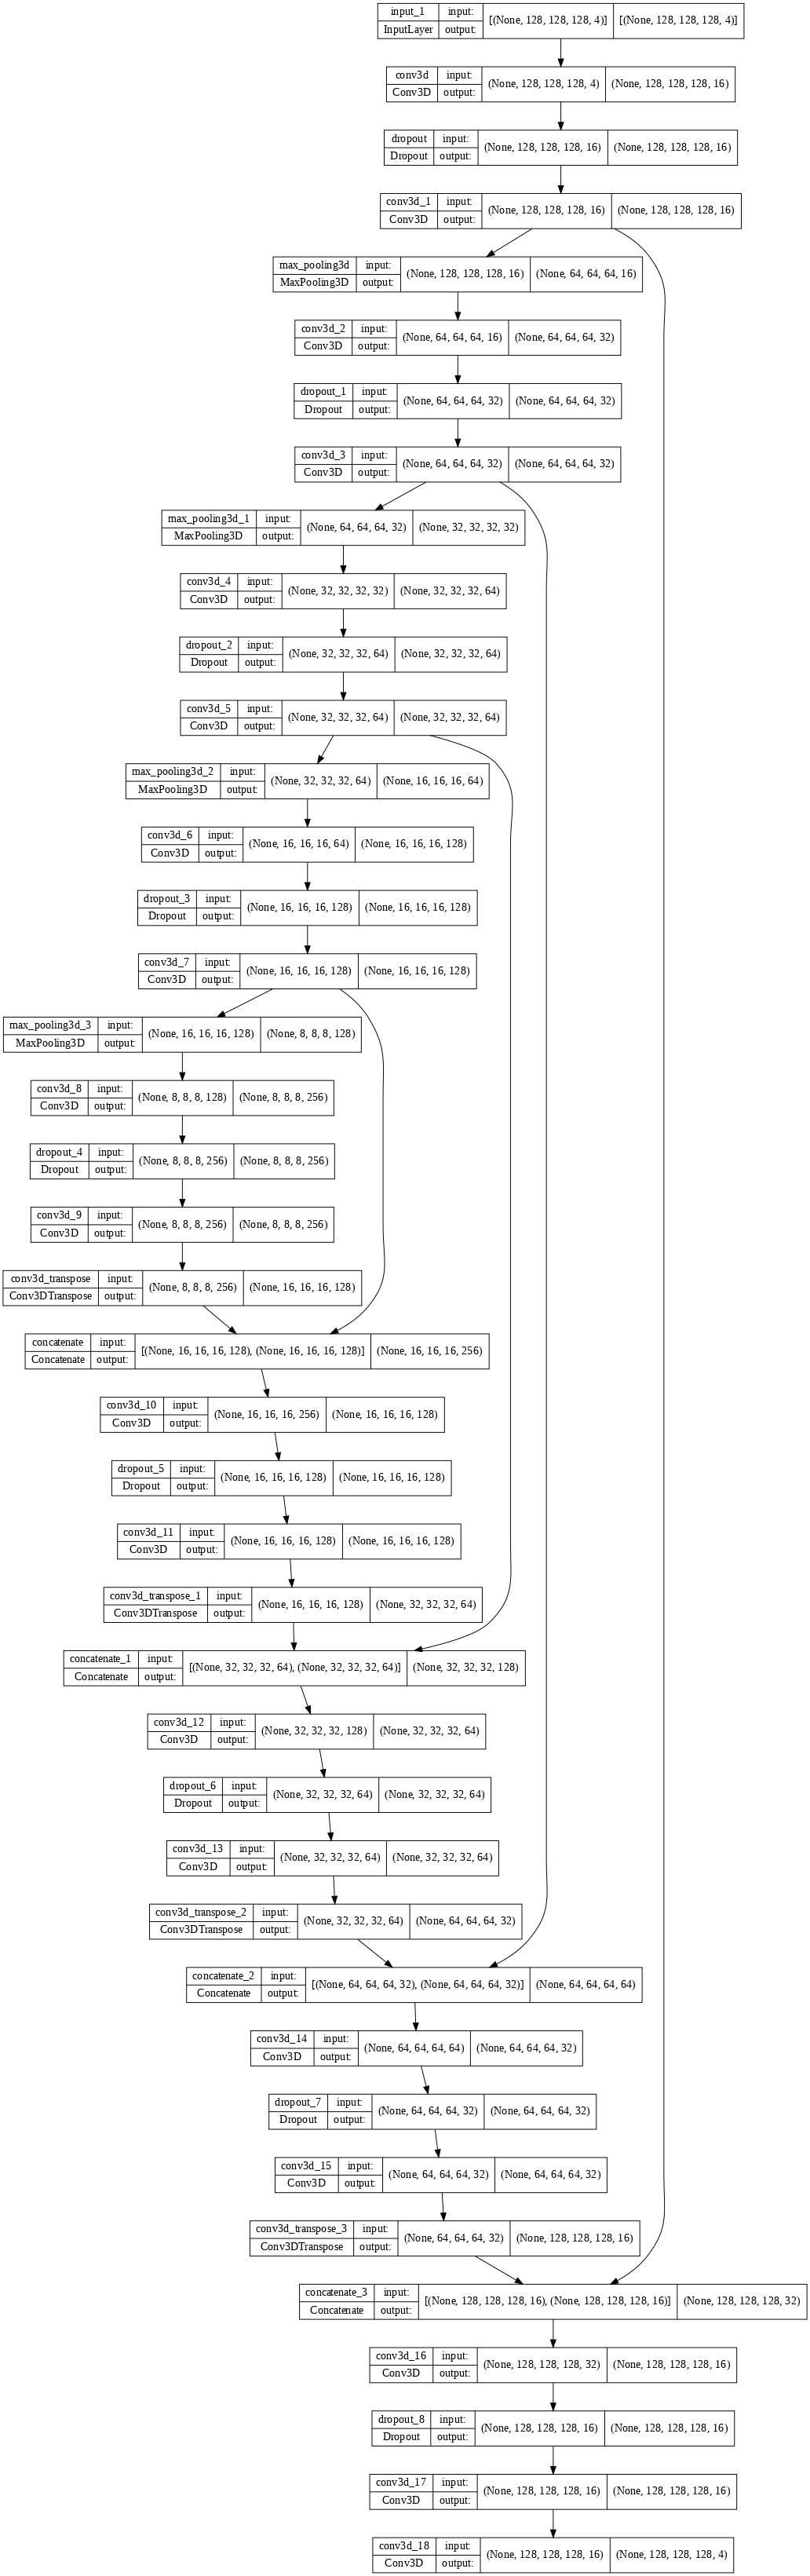

In [ ]:
plot_model(my_model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

Text(0.5, 0, 'Epoch')

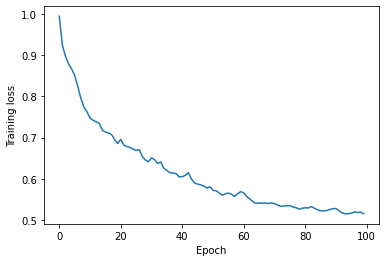

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('Training loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

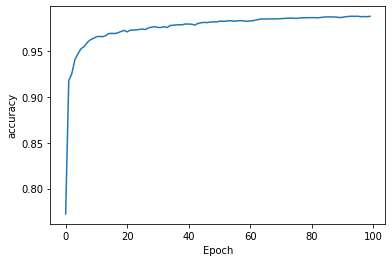

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('Training accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

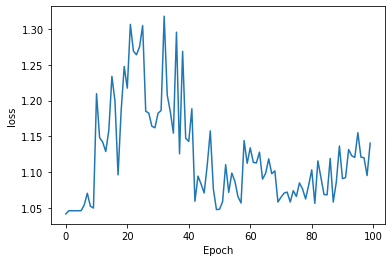

In [ ]:
plt.plot(history.history['val_loss'])
plt.ylabel('Validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

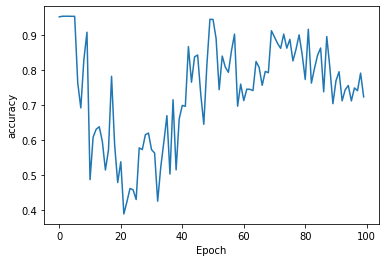

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')

loss: 0.9366 - accuracy: 0.9503 - iou_score: 0.2376 - dice_coef: 0.9503 - val_loss: 0.9366 - val_accuracy: 0.9534 - val_iou_score: 0.2384 - val_dice_coef: 0.9537

In [ ]:
# Hausdroff Distance

from mindspore import nn, Tensor

def hausdroff_dist(y_true,y_pred):
    metric = nn.HausdorffDistance()
    metric.clear()
    metric.update(y_true, y_pred, 0)
    mean_average_distance = metric.eval()
    return mean_average_distance.tolist()

from scipy.spatial.distance import directed_hausdorff
from skimage import metrics

### Average Hausdroff Distance

In [ ]:
dist_list = []
n_slice = 55
for i in range(0,200):
  img, msk = train_img_datagen.__next__()
  img_num = random.randint(0,img.shape[0]-1)
  test_img=img[img_num]
  test_mask=msk[img_num]
  test_mask_argmax=np.argmax(test_mask, axis=3)
  test_img_input = np.expand_dims(test_img, axis=0)
  test_prediction = my_model.predict(test_img_input)
  test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]
  dist_list.append(hausdroff_dist(test_mask_argmax[:,:,n_slice],test_prediction_argmax[:,:, n_slice]))

print("[Average Hausdroff Distance] : " + str(sum(dist_list) / len(dist_list)))

[Average Hausdroff Distance] : 12.611220597702854


## Plotting of HGG images

In [ ]:
# List of HGG nii images

t2_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/LGG/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/LGG/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/LGG/*/*flair.nii'))
t1_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/LGG/*/*t1.nii'))
mask_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/LGG/*/*seg.nii'))

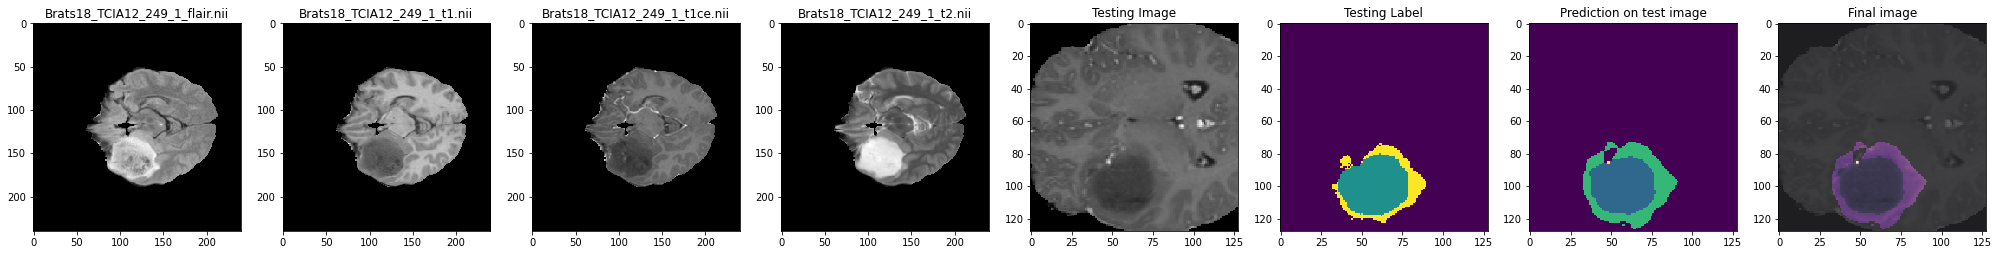

[Slide No] :55
[Hausdroff Distance] : 9.219544457292887


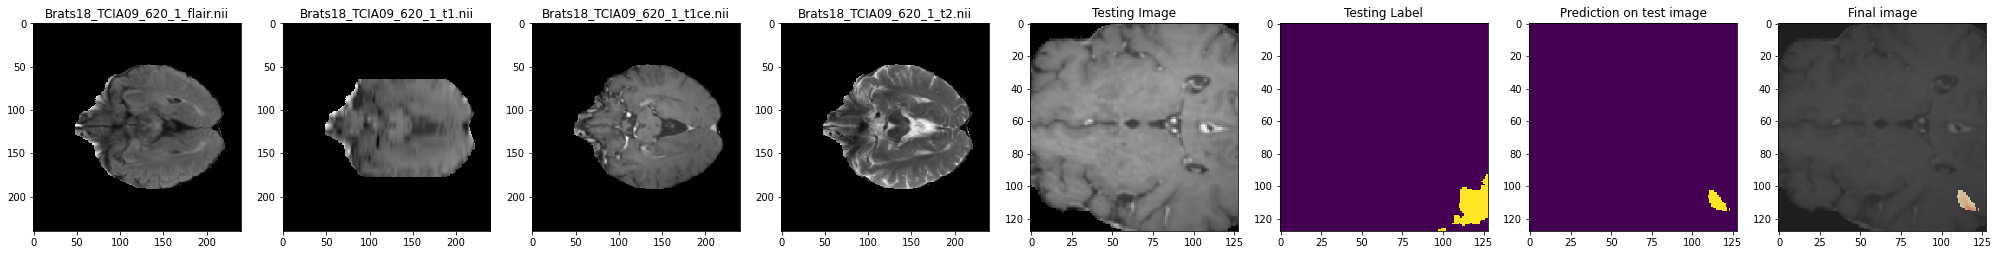

[Slide No] :55
[Hausdroff Distance] : 9.433981132056603


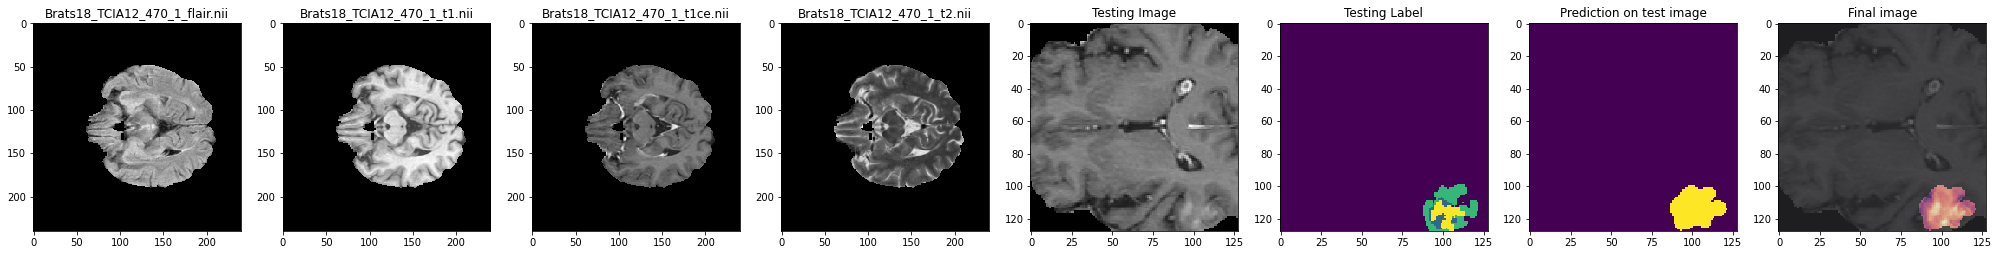

[Slide No] :55
[Hausdroff Distance] : 8.06225774829855


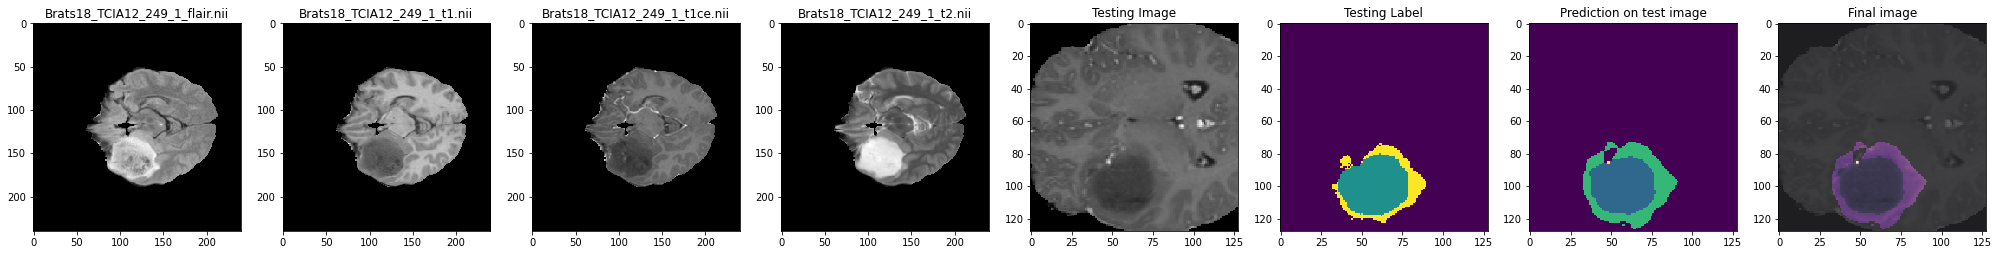

[Slide No] :55
[Hausdroff Distance] : 9.219544457292887


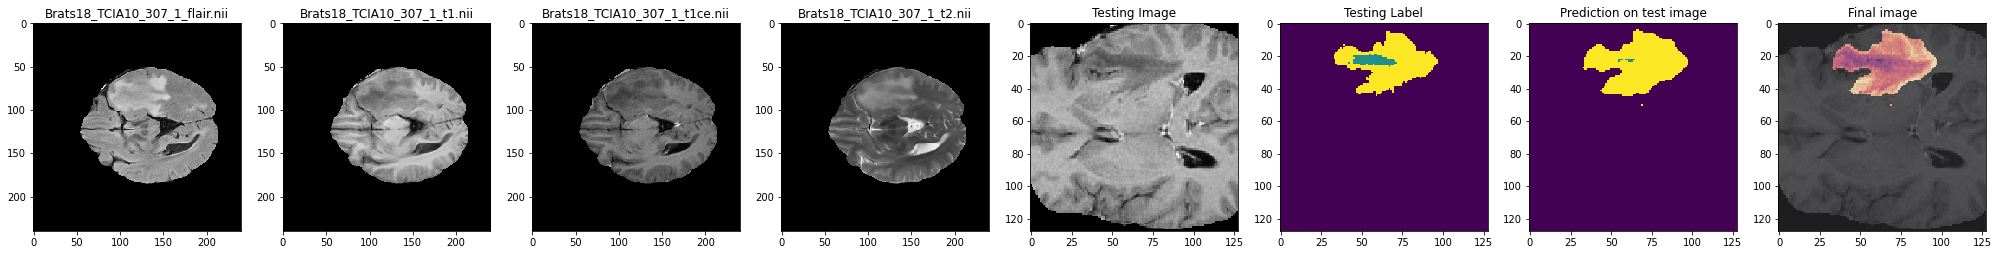

[Slide No] :55
[Hausdroff Distance] : 8.0


In [ ]:
for i in range(0,5):
  img = random.randint(0,len(mask_list))
  temp_image_t2=nib.load(t2_list[img]).get_fdata()
  temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
  
  temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
  temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
  
  temp_image_flair=nib.load(flair_list[img]).get_fdata()
  temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
  temp_image_t1 = nib.load(t1_list[img]).get_fdata()
  temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

  temp_mask=nib.load(mask_list[img]).get_fdata()
  temp_mask=temp_mask.astype(np.uint8)
  temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
  temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2,temp_image_t1], axis=3)
  #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
  #cropping x, y, and z
  test_img=temp_combined_images[56:184, 56:184, 13:141]
  temp_mask = temp_mask[56:184, 56:184, 13:141]
  test_mask= to_categorical(temp_mask, num_classes=4)
  test_mask_argmax=np.argmax(test_mask, axis=3)
  test_img_input = np.expand_dims(test_img, axis=0)
  test_prediction = my_model.predict(test_img_input)
  test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]
  from matplotlib import pyplot as plt
  import random
  #n_slice=random.randint(0, test_prediction_argmax.shape[2])
  n_slice = 55
  plt.figure(figsize=(35, 50))
  plt.subplot(1, 8, 1)
  flair_name = flair_list[img].split('/')[6]  
  plt.title(f'{flair_name}')
  plt.imshow(temp_image_flair[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 2) 
  t1_name = t1_list[img].split('/')[6] 
  plt.title(f'{t1_name}')
  plt.imshow(temp_image_t1[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 3)  
  t1ce_name = t1ce_list[img].split('/')[6]
  plt.title(f'{t1ce_name}')
  plt.imshow(temp_image_t1ce[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 4)
  t2_name = t2_list[img].split('/')[6]  
  plt.title(f'{t2_name}')
  plt.imshow(temp_image_t2[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 5)  
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,n_slice,1],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 6)
  plt.title('Testing Label')
  plt.imshow(test_mask_argmax[:,:,n_slice],interpolation='none')
  plt.subplot(1, 8, 7)
  plt.title('Prediction on test image')
  plt.imshow(test_prediction_argmax[:,:, n_slice],interpolation='none')
  plt.subplot(1, 8, 8)
  plt.title('Final image')
  plt.imshow( test_img[:,:,n_slice,1] ,interpolation='none',cmap="gray",alpha=0.7)
  plt.imshow(test_img[:,:,n_slice,1]*test_prediction_argmax[:,:, n_slice],interpolation='none',cmap="magma",alpha=0.6)
  plt.show()
  print("[Slide No] :"+str(n_slice))
  print("[Hausdroff Distance] : " + str(hausdroff_dist(test_mask_argmax[:,:,n_slice],test_prediction_argmax[:,:, n_slice]) ) )


## Ploting of LGG images

In [ ]:
# List of LGG nii images

t2_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/HGG/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/HGG/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/HGG/*/*flair.nii'))
t1_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/HGG/*/*t1.nii'))
mask_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Training/HGG/*/*seg.nii'))

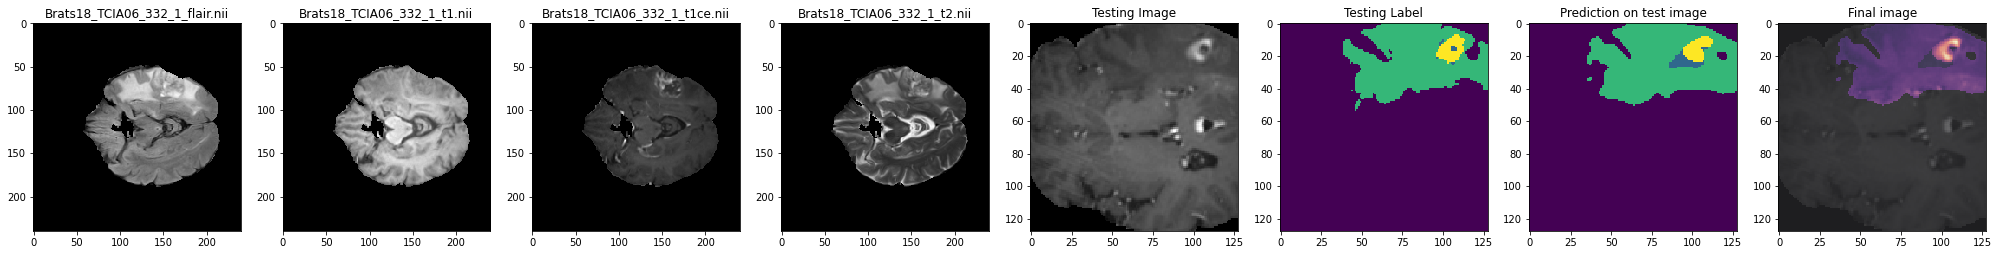

[Slide No] :55
[Hausdroff Distance] : 10.0


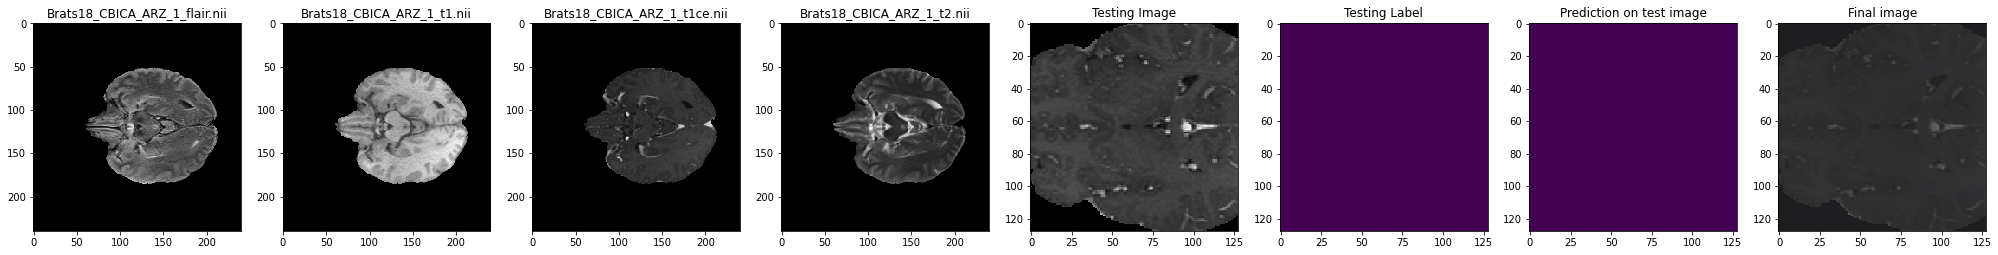

[Slide No] :55
[Hausdroff Distance] : 0.0


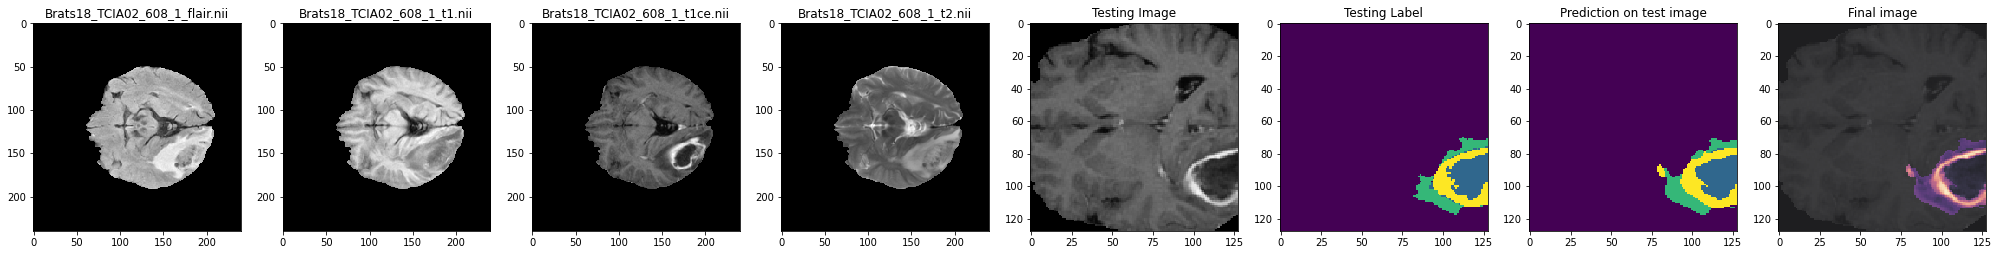

[Slide No] :55
[Hausdroff Distance] : 8.48528137423857


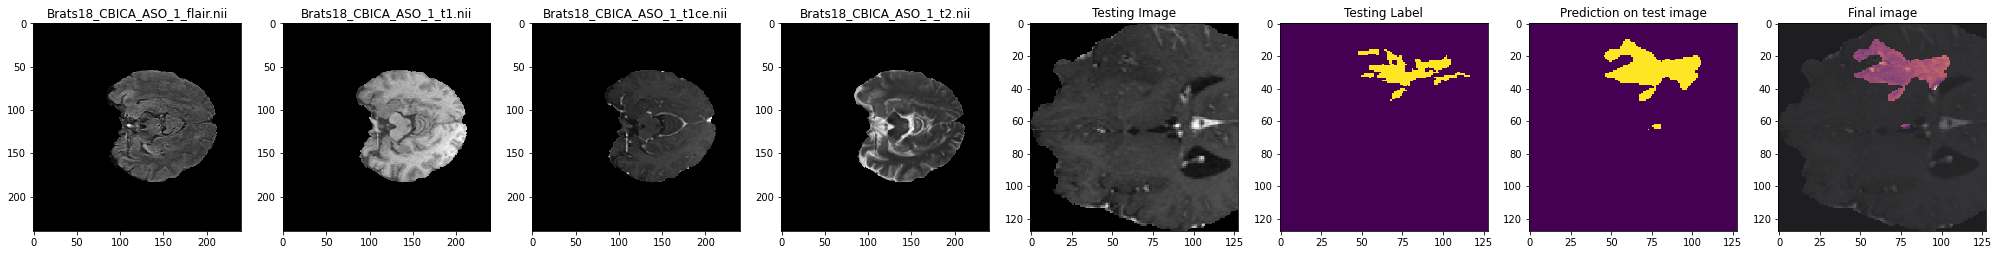

[Slide No] :55
[Hausdroff Distance] : 20.248456731316587


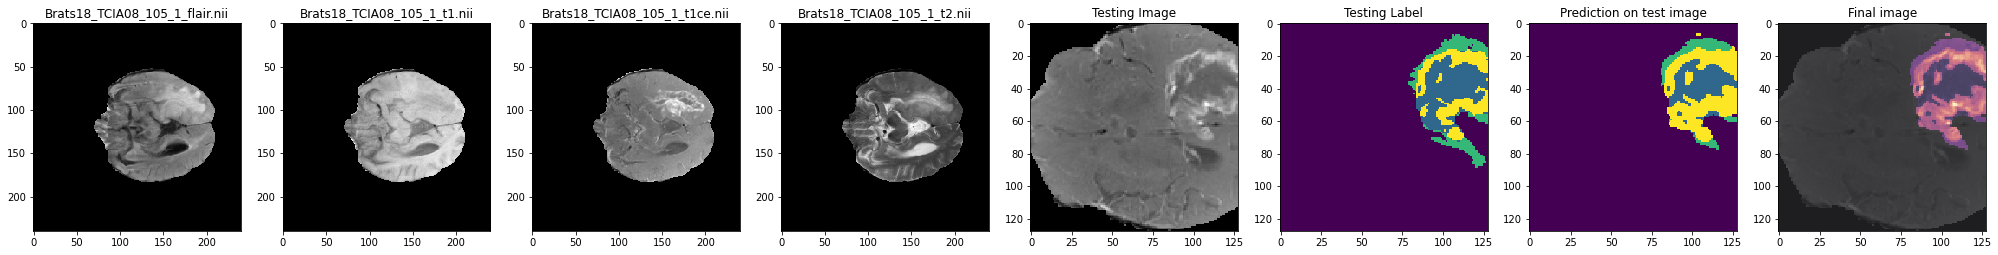

[Slide No] :55
[Hausdroff Distance] : 9.0


In [ ]:
for i in range(0,5):
  img = random.randint(0,len(mask_list))
  temp_image_t2=nib.load(t2_list[img]).get_fdata()
  temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
  
  temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
  temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
  
  temp_image_flair=nib.load(flair_list[img]).get_fdata()
  temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
  temp_image_t1 = nib.load(t1_list[img]).get_fdata()
  temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

  temp_mask=nib.load(mask_list[img]).get_fdata()
  temp_mask=temp_mask.astype(np.uint8)
  temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
  temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2,temp_image_t1], axis=3)
  #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
  #cropping x, y, and z
  test_img=temp_combined_images[56:184, 56:184, 13:141]
  temp_mask = temp_mask[56:184, 56:184, 13:141]
  test_mask= to_categorical(temp_mask, num_classes=4)
  test_mask_argmax=np.argmax(test_mask, axis=3)
  test_img_input = np.expand_dims(test_img, axis=0)
  test_prediction = my_model.predict(test_img_input)
  test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]
  from matplotlib import pyplot as plt
  import random
  #n_slice=random.randint(0, test_prediction_argmax.shape[2])
  n_slice = 55
  plt.figure(figsize=(35, 50))
  plt.subplot(1, 8, 1)
  flair_name = flair_list[img].split('/')[6]  
  plt.title(f'{flair_name}')
  plt.imshow(temp_image_flair[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 2) 
  t1_name = t1_list[img].split('/')[6] 
  plt.title(f'{t1_name}')
  plt.imshow(temp_image_t1[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 3)  
  t1ce_name = t1ce_list[img].split('/')[6]
  plt.title(f'{t1ce_name}')
  plt.imshow(temp_image_t1ce[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 4)
  t2_name = t2_list[img].split('/')[6]  
  plt.title(f'{t2_name}')
  plt.imshow(temp_image_t2[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 5)  
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,n_slice,1],interpolation='none', cmap='gray')
  plt.subplot(1, 8, 6)
  plt.title('Testing Label')
  plt.imshow(test_mask_argmax[:,:,n_slice],interpolation='none')
  plt.subplot(1, 8, 7)
  plt.title('Prediction on test image')
  plt.imshow(test_prediction_argmax[:,:, n_slice],interpolation='none')
  plt.subplot(1, 8, 8)
  plt.title('Final image')
  plt.imshow( test_img[:,:,n_slice,1] ,interpolation='none',cmap="gray",alpha=0.7)
  plt.imshow(test_img[:,:,n_slice,1]*test_prediction_argmax[:,:, n_slice],interpolation='none',cmap="magma",alpha=0.6)
  plt.show()
  print("[Slide No] :"+str(n_slice))
  print("[Hausdroff Distance] : " + str(hausdroff_dist(test_mask_argmax[:,:,n_slice],test_prediction_argmax[:,:, n_slice]) ) )


## Validation Image Ploting

In [ ]:
# List of all the nii validation images

val_t2_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*t2.nii'))
val_t1ce_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*t1ce.nii'))
val_flair_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*flair.nii'))
val_t1_list = sorted(glob.glob('/content/brats2018/MICCAI_BraTS_2018_Data_Validation/*/*t1.nii'))

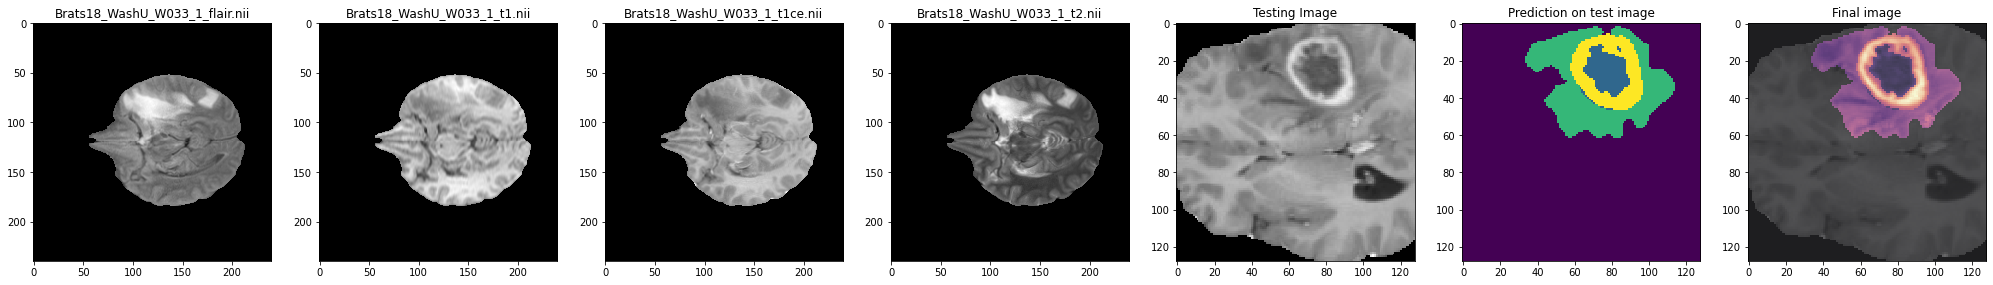

[Slide No] :55


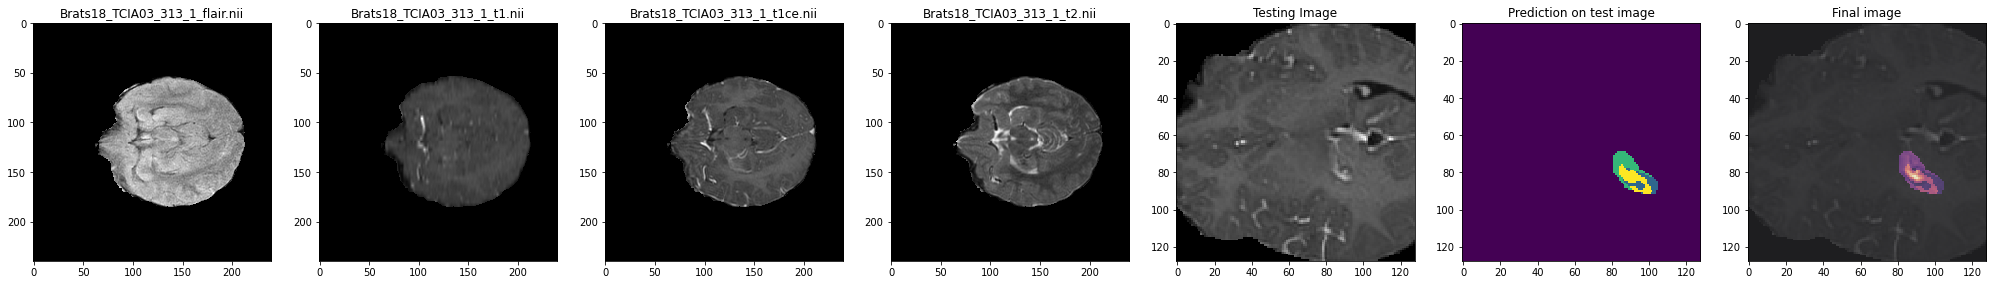

[Slide No] :55


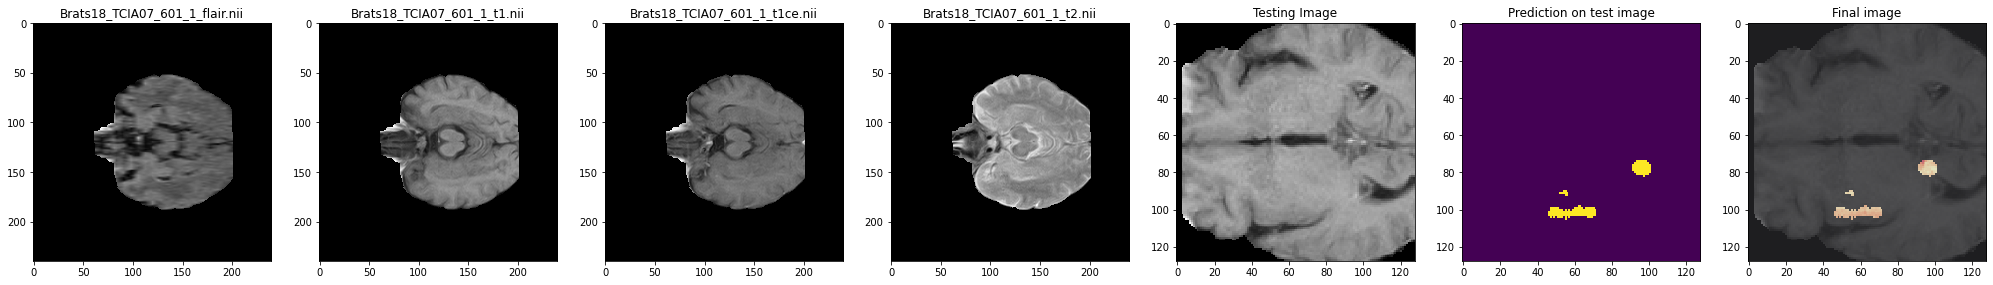

[Slide No] :55


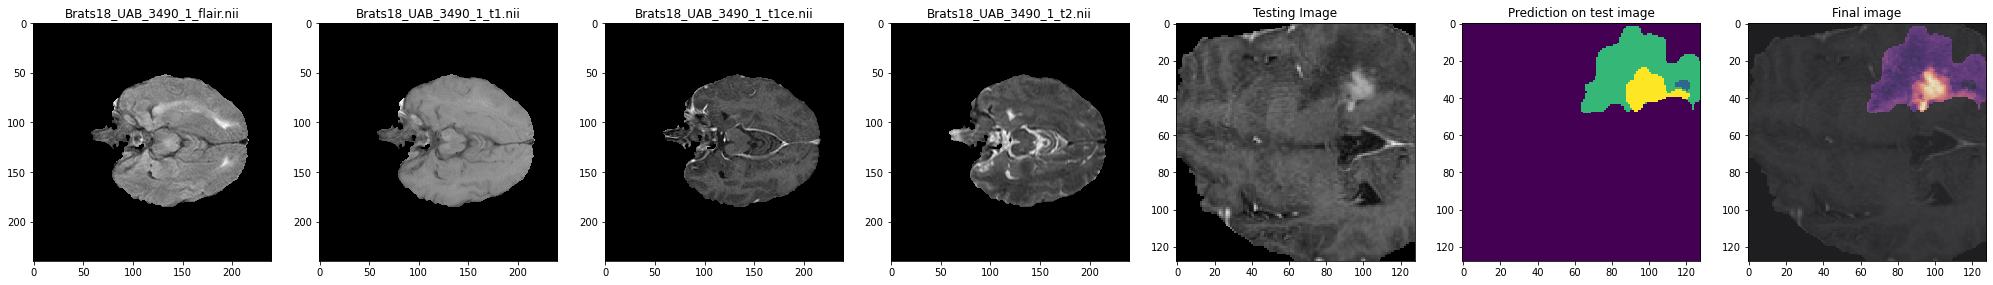

[Slide No] :55


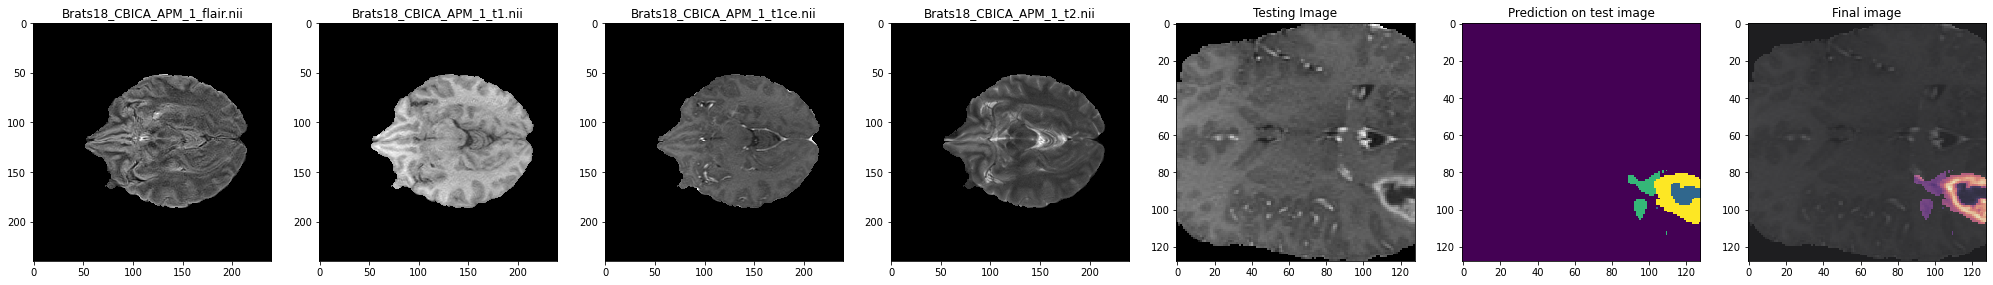

[Slide No] :55


In [ ]:
# pLotting from validation images dataset

for i in range(0,5):

  img = random.randint(0,len(val_t2_list))

  temp_image_t2=nib.load(val_t2_list[img]).get_fdata()
  temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
  temp_image_t1ce=nib.load(val_t1ce_list[img]).get_fdata()
  temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
  temp_image_flair=nib.load(val_flair_list[img]).get_fdata()
  temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

  temp_image_t1 = nib.load(val_t1_list[img]).get_fdata()
  temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
  temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2,temp_image_t1], axis=3)
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
  test_img=temp_combined_images[56:184, 56:184, 13:141]

  test_img_input = np.expand_dims(test_img, axis=0)
  test_prediction = my_model.predict(test_img_input)
  test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

  from matplotlib import pyplot as plt
  import random

  n_slice = 55
  plt.figure(figsize=(35, 50))
  plt.subplot(1, 7, 1)  
  flair_name = val_flair_list[img].split('/')[5]  
  plt.title(f'{flair_name}')
  plt.imshow(temp_image_flair[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 7, 2) 
  t1_name = val_t1_list[img].split('/')[5] 
  plt.title(f'{t1_name}')
  plt.imshow(temp_image_t1[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 7, 3)  
  t1ce_name = val_t1ce_list[img].split('/')[5]
  plt.title(f'{t1ce_name}')
  plt.imshow(temp_image_t1ce[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 7, 4)
  t2_name = val_t2_list[img].split('/')[5]  
  plt.title(f'{t2_name}')
  plt.imshow(temp_image_t2[:,:,n_slice],interpolation='none', cmap='gray')
  plt.subplot(1, 7, 5)  
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,n_slice,1],interpolation='none', cmap='gray')
  plt.subplot(1, 7, 6)
  plt.title('Prediction on test image')
  plt.imshow(test_prediction_argmax[:,:, n_slice],interpolation='none')
  plt.subplot(1, 7, 7)
  plt.title('Final image')
  plt.imshow( test_img[:,:,n_slice,1] ,interpolation='none',cmap="gray",alpha=0.7)
  plt.imshow(test_img[:,:,n_slice,1]*test_prediction_argmax[:,:, n_slice],interpolation='none',cmap="magma",alpha=0.6)
  plt.show()
  print("[Slide No] :"+str(n_slice))

In [ ]:

metrics = ['Accuracy','IOU Score','Dice Score','Validation Loss','Validation Accuracy','Validation IOU Score','Validation Dice Score']
UNET = [0.9878, 0.7640, 0.9877,1.1220,0.6424, 0.1606,0.6468]
VGG16 = [0.9457,  0.4001,  0.9435, 0.9659,0.9543,0.2461,0.9459]

x_axis = np.arange(len(metrics))

plt.figure(figsize=(20, 10))
plt.bar(x_axis -0.2, VGG16, width=0.4, label = 'VGG16')
plt.bar(x_axis +0.2, UNET, width=0.4, label = 'UNET')

plt.xticks(x_axis, metrics)

plt.legend()
plt.show()

In [ ]:
metrics = ['Loss']
UNET = [-12.8220]
VGG16 = [-1.2890]

x_axis = np.arange(len(metrics))

plt.figure(figsize=(5, 5))
plt.bar(x_axis -0.2, VGG16, width=0.4, label = 'VGG16')
plt.bar(x_axis +0.2, UNET, width=0.4, label = 'UNET')

plt.xticks(x_axis, metrics)

plt.legend()
plt.show()